## **Kelompok Tambak Udang :**
    1. Ariandini Aulia Bachry - H071201054
    2. Muhammad Idham Anugerah - H071201060
    3. A. Fuad Ahsan Basir - H071201076
    4. Nur Aqila Aprilia - H071201088

# Pre-Processing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns,set()

(<module 'seaborn' from 'C:\\Users\\Lenovo\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>,
 set())

In [3]:
df = pd.read_csv("car_sales.csv")
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
df = df.drop("Model", axis=1)

In [5]:
df.shape

(4345, 8)

## Korelasi Data

In [6]:
df.corr()

,Price,Mileage,EngineV,Year
Price,1.000000,-0.464795,0.058664,0.487031
Mileage,-0.464795,1.000000,0.020959,-0.668635
EngineV,0.058664,0.020959,1.000000,-0.022866
Year,0.487031,-0.668635,-0.022866,1.000000


## Menangani Outlier

In [15]:
df.dtypes

Brand            object
Price           float64
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
dtype: object

<AxesSubplot:xlabel='Price'>

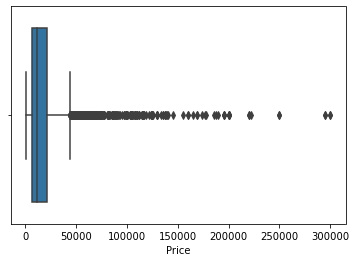

In [7]:
sns.boxplot(x=df["Price"])

<AxesSubplot:xlabel='Mileage'>

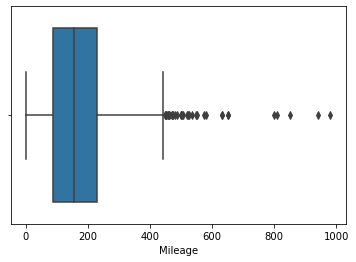

In [8]:
sns.boxplot(x=df["Mileage"])

<AxesSubplot:xlabel='Year'>

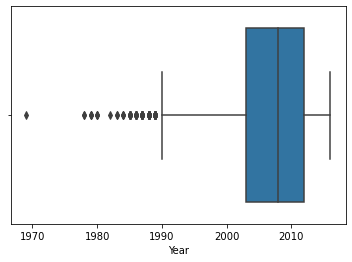

In [9]:
sns.boxplot(x=df["Year"])

In [5]:
df_outlier = df[["Price", "Mileage", "Year"]]
df_outlier

,Price,Mileage,Year
0,4200.0,277,1991
1,7900.0,427,1999
2,13300.0,358,2003
3,23000.0,240,2007
4,18300.0,120,2011
...,...,...,...
4340,125000.0,9,2014
4341,6500.0,1,1999
4342,8000.0,194,1985
4343,14200.0,31,2014


In [6]:
df_no_outlier = df.copy()

In [11]:
for i in df_outlier.columns:
    Q1 = df_no_outlier[i].quantile(0.25)
    Q3 = df_no_outlier[i].quantile(0.75)
    IQR = Q3 - Q1
    min_IQR = Q1 - 1.5 * IQR
    max_IQR = Q3 + 1.5 * IQR
    df_no_outlier =  df_no_outlier[(df_no_outlier[i]>min_IQR) & (df_no_outlier[i]<max_IQR)]

In [12]:
df_no_outlier.shape

(3685, 8)

<AxesSubplot:xlabel='Price'>

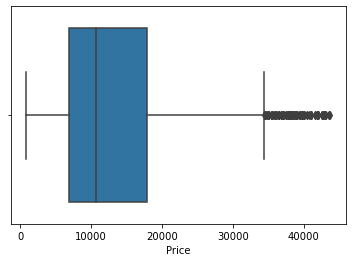

In [15]:
sns.boxplot(x=df_no_outlier["Price"])

<AxesSubplot:xlabel='Mileage'>

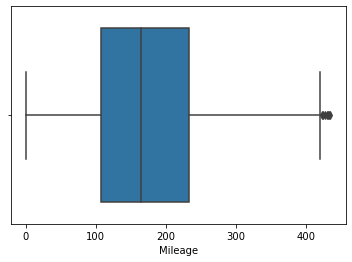

In [16]:
sns.boxplot(x=df_no_outlier["Mileage"])

<AxesSubplot:xlabel='Year'>

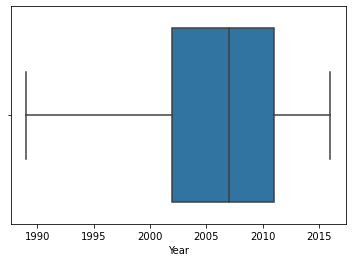

In [17]:
sns.boxplot(x=df_no_outlier["Year"])

## Menangani Missing Value

In [18]:
df_no_outlier.isna().sum()

Brand             0
Price             0
Body              0
Mileage           0
EngineV         136
Engine Type       0
Registration      0
Year              0
dtype: int64

In [19]:
df_no_mv = df_no_outlier.copy()

In [20]:
df_no_mv["EngineV"].fillna(df_no_mv["EngineV"].mean(), inplace=True)

In [21]:
df_no_mv.isna().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [23]:
df.dtypes

Brand            object
Price           float64
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
dtype: object

In [24]:
df_no_mv.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


## Feature dan Label

In [25]:
X = df_no_mv.drop(['Price'], axis=1)
y = df_no_mv['Price']

## Label Encoding

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Brand", "Body", "Engine Type", "Registration"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                  categorical_features)],
                                remainder ="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.77000000e+02, 2.00000000e+00, 1.99100000e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        4.27000000e+02, 2.90000000e+00, 1.99900000e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        3.58000000e+02, 5.00000000e+00, 2.00300000e+03],
       ...,
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 3.50000000e+00, 1.99900000e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.10000000e+01, 2.71395323e+00, 2.01400000e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.24000000e+02, 2.00000000e+00, 2.01300000e+03]])

# Melatih Model

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2, random_state=8)

## Decision Tree

In [28]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=8)
dtree.fit(X_train, y_train)
dtree.score(X_test, y_test)

0.7850739597344707

## Random Forest Regression

In [29]:
from sklearn.ensemble import RandomForestRegressor

rfreg = RandomForestRegressor()
rfreg.fit(X_train, y_train)
rfreg.score(X_test, y_test)

0.8585172957384477